In [212]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/investing-style-analysis/F-F_Research_Data_5_Factors (monthly).CSV
/kaggle/input/investing-style-analysis/F-F_Research_Data_5_Factors_2x3_daily.CSV
/kaggle/input/investing-style-analysis/ARK Innovation ETF.csv
/kaggle/input/investing-style-analysis/ARK Innovation ETF (monthly).csv
/kaggle/input/investing-style-analysis/Berkshire Hathaway (BRK-A).csv
/kaggle/input/investing-style-analysis/Berkshire Hathaway (BRK-A) (monthly).csv
/kaggle/input/investing-style-analysis/Bershire Hathaway (BRK-B) (monthly).csv
/kaggle/input/investing-style-analysis/Berkshire Hathaway (BRK-B).csv
/kaggle/input/seeking-alpha-actively-managed-etf/SPDR SP Kensho New Economies Composite ETF (KOMP).csv
/kaggle/input/seeking-alpha-actively-managed-etf/AdvisorShares Ranger Equity Bear ETF (HDGE).csv
/kaggle/input/seeking-alpha-actively-managed-etf/BlackRock Multi-Asset Income (BCICX).csv
/kaggle/input/seeking-alpha-actively-managed-etf/BlackRock Managed Income Fund Investor A Shares (BLADX).csv
/kaggl

#### Actively managed ETF's cost. Investors pay a fee for the money manager if they invest in an actively managed ETF. Many managers will tell investors how they had beaten the market, i.e., they generated returns that are higher than the market return. Did they really beat the market? Could the investors have gotten the same rate of return by just investing in passive index fund?

#### The Capital Asset Price Model (CAPM) says that an the difference between an asset's expected return and risk-free rate is equal to the asset's beta mulutiplied by the difference between market return and risk-free rate.

$$E\left ( r_{i} \right )-r_{f}=\beta _{i}\left ( E\left ( r_{m} \right )-r_{f} \right )$$

#### There are many applications of the CAPM model. In this notebook, I will demonstrate how to use the CAPM model to assess the performance of an actively managed ETF. Was there any alpha in the returns of these actively managed ETF's? In other words, did the managers of these actively traded ETF's really generated returns that were above the market return? Was it worth to pay these money managers? 

#### Load the data.

In [213]:
komp=pd.read_csv("/kaggle/input/seeking-alpha-actively-managed-etf/SPDR SP Kensho New Economies Composite ETF (KOMP).csv")

In [214]:
komp.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
24,2020-11-01,43.810001,53.810001,43.509998,52.790001,52.599113,4657700
25,2020-12-01,53.290001,58.930000,51.500000,57.639999,57.431576,2952200
26,2021-01-01,58.209999,69.639999,56.400002,64.570000,64.570000,6775100
27,2021-02-01,65.690002,76.760002,64.699997,67.239998,67.239998,9114600
28,2021-03-01,69.400002,71.129997,69.040001,71.019997,71.019997,247800


In [215]:
komp.shape

(29, 7)

In [216]:
hdge=pd.read_csv("/kaggle/input/seeking-alpha-actively-managed-etf/AdvisorShares Ranger Equity Bear ETF (HDGE).csv")

In [217]:
hdge.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
117,2020-11-01,43.799999,44.099998,32.799999,33.099998,33.099998,2129680
118,2020-12-01,32.799999,33.500000,29.900000,30.299999,30.299999,1262440
119,2021-01-01,30.299999,31.100000,26.799999,27.299999,27.299999,1171840
120,2021-02-01,27.400000,27.500000,25.180000,25.959999,25.959999,1885770
121,2021-03-01,25.709999,25.709999,25.240000,25.520000,25.520000,173000


In [218]:
hdge.shape

(122, 7)

In [219]:
bcicx=pd.read_csv("/kaggle/input/seeking-alpha-actively-managed-etf/BlackRock Multi-Asset Income (BCICX).csv")

In [220]:
bcicx.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
150,2020-11-01,10.52,10.99,10.52,10.96,10.872356,0
151,2020-12-01,11.01,11.15,11.01,11.15,11.090101,0
152,2021-01-01,11.12,11.27,11.10,11.10,11.072176,0
153,2021-02-01,11.16,11.32,11.15,11.15,11.150000,0
154,2021-03-01,11.23,11.23,11.23,11.23,11.230000,0


In [221]:
bcicx.shape

(155, 7)

In [222]:
bladx=pd.read_csv("/kaggle/input/seeking-alpha-actively-managed-etf/BlackRock Managed Income Fund Investor A Shares (BLADX).csv")

In [223]:
bladx.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
156,2020-11-01,9.91,10.19,9.91,10.18,10.104695,0
157,2020-12-01,10.20,10.28,10.20,10.28,10.227037,0
158,2021-01-01,10.26,10.33,10.24,10.24,10.217089,0
159,2021-02-01,10.26,10.35,10.26,10.27,10.270000,0
160,2021-03-01,10.31,10.31,10.31,10.31,10.310000,0


In [224]:
bladx.shape

(161, 7)

In [225]:
arkk=pd.read_csv("/kaggle/input/seeking-alpha-actively-managed-etf/ARK Innovation ETF (ARKK).csv")

In [226]:
arkk.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
72,2020-11-01,91.970001,113.760002,89.389999,112.370003,110.600479,61456400
73,2020-12-01,114.000000,137.080002,109.599998,124.489998,122.529617,115844400
74,2021-01-01,126.220001,149.850006,122.440002,137.440002,137.440002,146050100
75,2021-02-01,139.979996,159.699997,126.070000,130.360001,130.360001,226351300
76,2021-03-01,134.539993,137.000000,133.509995,136.699997,136.699997,11546900


In [227]:
arkk.shape

(77, 7)

In [228]:
bdhix=pd.read_csv("/kaggle/input/seeking-alpha-actively-managed-etf/BlackRock Dynamic High Income (BDHIX).csv")

In [229]:
bdhix.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
71,2020-11-01,8.94,9.53,8.94,9.48,9.358028,0
72,2020-12-01,9.55,9.74,9.55,9.74,9.655209,0
73,2021-01-01,9.70,9.91,9.68,9.68,9.640409,0
74,2021-02-01,9.76,9.99,9.74,9.74,9.740000,0
75,2021-03-01,9.85,9.85,9.85,9.85,9.850000,0


In [230]:
bdhix.shape

(76, 7)

In [231]:
iwc=pd.read_csv("/kaggle/input/seeking-alpha-actively-managed-etf/IShares Micro-Cap (IWC).csv")

In [232]:
iwc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
182,2020-11-01,92.320000,112.320000,92.320000,110.610001,110.254646,858100
183,2020-12-01,111.220001,122.580002,109.550003,118.650002,118.268814,1097300
184,2021-01-01,119.300003,140.779999,116.480003,135.259995,135.259995,1458600
185,2021-02-01,137.289993,154.789993,134.300003,143.610001,143.610001,2922500
186,2021-03-01,147.839996,150.539993,147.160004,150.440002,150.440002,133000


In [233]:
iwc.shape

(187, 7)

In [234]:
hail=pd.read_csv("/kaggle/input/seeking-alpha-actively-managed-etf/SPDR SP Kensho Smart Mobility ETF (HAIL).csv")

In [235]:
hail.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
34,2020-11-01,38.669998,53.189999,38.669998,50.820000,50.799034,1361500
35,2020-12-01,51.759998,56.160000,48.180000,54.860001,54.837368,1518600
36,2021-01-01,55.599998,66.550003,53.799999,61.720001,61.720001,2684200
37,2021-02-01,62.139999,71.430000,59.520000,61.740002,61.740002,3834600
38,2021-03-01,63.580002,64.239998,62.924999,64.089996,64.089996,96000


In [236]:
hail.shape

(39, 7)

In [237]:
factors=pd.read_csv("/kaggle/input/investing-style-analysis/F-F_Research_Data_5_Factors (monthly).CSV")

In [238]:
factors.tail()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
686,9/1/2020,-3.63,0.07,-2.51,-1.15,-1.77,0.01
687,10/1/2020,-2.10,4.76,4.03,-0.60,-0.53,0.01
688,11/1/2020,12.47,6.75,2.11,-2.78,1.05,0.01
689,12/1/2020,4.63,4.67,-1.36,-2.15,0.00,0.01
690,1/1/2021,-0.04,6.87,2.85,-3.33,4.68,0.00


In [239]:
factors.shape

(691, 7)

#### The latest date for which data is available for the actively managed ETF's is 3/1/2021. However, the latest date for the factor data obtained from the Fama French Research Library is 1/1/2021. I need to drop the last two rows from each of the ETF dataset.

In [240]:
komp=komp[:-2]
hdge=hdge[:-2]
bcicx=bcicx[:-2]
bladx=bladx[:-2]
arkk=arkk[:-2]
bdhix=bdhix[:-2]
iwc=iwc[:-2]
hail=hail[:-2]

In [241]:
hail.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
32,2020-09-01,38.040001,39.139999,33.759998,37.483002,37.437183,512300
33,2020-10-01,38.099998,41.980000,37.130001,38.525002,38.509109,592100
34,2020-11-01,38.669998,53.189999,38.669998,50.820000,50.799034,1361500
35,2020-12-01,51.759998,56.160000,48.180000,54.860001,54.837368,1518600
36,2021-01-01,55.599998,66.550003,53.799999,61.720001,61.720001,2684200


In [242]:
iwc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
180,2020-09-01,93.930000,95.379997,86.029999,90.470001,89.878525,582800
181,2020-10-01,90.910004,99.309998,90.000000,91.790001,91.495110,599600
182,2020-11-01,92.320000,112.320000,92.320000,110.610001,110.254646,858100
183,2020-12-01,111.220001,122.580002,109.550003,118.650002,118.268814,1097300
184,2021-01-01,119.300003,140.779999,116.480003,135.259995,135.259995,1458600


In [243]:
bdhix.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
69,2020-09-01,9.19,9.28,8.93,9.03,8.829432,0
70,2020-10-01,9.06,9.24,8.88,8.88,8.726397,0
71,2020-11-01,8.94,9.53,8.94,9.48,9.358028,0
72,2020-12-01,9.55,9.74,9.55,9.74,9.655209,0
73,2021-01-01,9.70,9.91,9.68,9.68,9.640409,0


In [244]:
arkk.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
70,2020-09-01,96.449997,98.900002,81.330002,92.000000,90.551247,58989900
71,2020-10-01,93.389999,106.150002,89.949997,90.790001,89.360306,56731900
72,2020-11-01,91.970001,113.760002,89.389999,112.370003,110.600479,61456400
73,2020-12-01,114.000000,137.080002,109.599998,124.489998,122.529617,115844400
74,2021-01-01,126.220001,149.850006,122.440002,137.440002,137.440002,146050100


In [245]:
bcicx.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
148,2020-09-01,10.71,10.76,10.51,10.58,10.437659,0
149,2020-10-01,10.60,10.74,10.47,10.47,10.356600,0
150,2020-11-01,10.52,10.99,10.52,10.96,10.872356,0
151,2020-12-01,11.01,11.15,11.01,11.15,11.090101,0
152,2021-01-01,11.12,11.27,11.10,11.10,11.072176,0


In [246]:
hdge.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
115,2020-09-01,43.599998,46.799999,42.099998,44.900002,44.900002,2188530
116,2020-10-01,44.700001,45.799999,41.400002,44.400002,44.400002,1661140
117,2020-11-01,43.799999,44.099998,32.799999,33.099998,33.099998,2129680
118,2020-12-01,32.799999,33.500000,29.900000,30.299999,30.299999,1262440
119,2021-01-01,30.299999,31.100000,26.799999,27.299999,27.299999,1171840


In [247]:
komp.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
22,2020-09-01,43.439999,44.400002,40.090000,42.860001,42.637966,2473100
23,2020-10-01,43.080002,47.189999,42.680000,43.250000,43.093609,2280300
24,2020-11-01,43.810001,53.810001,43.509998,52.790001,52.599113,4657700
25,2020-12-01,53.290001,58.930000,51.500000,57.639999,57.431576,2952200
26,2021-01-01,58.209999,69.639999,56.400002,64.570000,64.570000,6775100


In [248]:
komp["Monthly_return"]=komp["Close"].pct_change()
komp=komp.dropna()

hdge["Monthly_return"]=hdge["Close"].pct_change()
hdge=hdge.dropna()

bcicx["Monthly_return"]=bcicx["Close"].pct_change()
bcicx=bcicx.dropna()

bladx["Monthly_return"]=bladx["Close"].pct_change()
bladx=bladx.dropna()

arkk["Monthly_return"]=arkk["Close"].pct_change()
arkk=arkk.dropna()

bdhix["Monthly_return"]=bdhix["Close"].pct_change()
bdhix=bdhix.dropna()

iwc["Monthly_return"]=iwc["Close"].pct_change()
iwc=iwc.dropna()

hail["Monthly_return"]=hail["Close"].pct_change()
hail=hail.dropna()

#### Let's re-arrange the mathematical formulua for the Captial Asset Pricing Model.

$$E\left ( r_{i} \right )-r_{f}=\beta _{i}\left ( E\left ( r_{m} \right )-r_{f} \right )$$

$$\Rightarrow   \alpha =  \left (E\left ( r_{i} \right ) -r_{f} \right ) - \beta _{i}\left ( E\left ( r_{m} \right )-r_{f} \right )$$

#### I am going to run each of the actively managed ETF through the re-arranged CAPM formula above. If alpha comes out to be positive, then the fund manager indeed did beat the market and added value to the fund. If alpha comes out to be 0, that means the fund manager did not add any value and the investor could have gotten the same rate of return by investing in a passive index fund. In the worst case scenario, if alpha comes out to be negative, not only that the fund manager did not add value,  but also that he/she even destroyed alpha. The rationale here is if the fund manager did not add value, then, according to the CAPM, the differene between the asset's return and the risk-free rate should is exactly the asset's beta multiplied by the difference between market return and risk-free rate. If the fund manager added value, then, when the subtract the right side of the original equation from the left side, we should get a positive constant and that positive constant is the alpha that we are looking for.

#### The data from the Fama French Research Library has the monthly market return and risk-free rate. The beta's of the actively managed ETF's can be obtained from Yahoo!Finance.

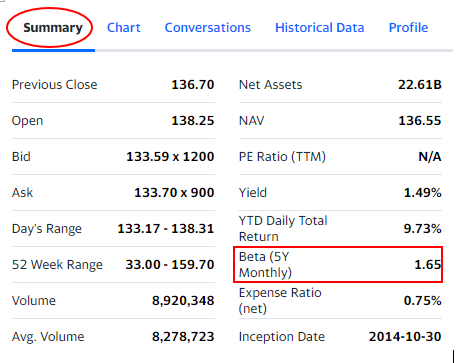

In [249]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("/kaggle/input/seeking-alpha-actively-managed-etf/beta.png")

|Actively managed ETF|Beta|
|--------------------|----|
|BlackRock Multi-Asset Income (BCICX)|0.72|
|BlackRock Dynamic High Income (BDHIX)|1.15|
|BlackRock Managed Income (BLADX)|0.46|
|IShares Micro-Cap (IWC)|1.29|
|SPDR S&P Kensho Smart Mobility (HAIL)|1.69|
|SPDR Kensho New Economies Comps (KOMP)|0.00|
|ARK Innovation (ARKK)|1.65|
|AdvisorShares Ranger Equity Bear ETF (HDGE)|-1.37|

In [250]:
def seeking_alpha(df,beta):
    factors2=factors[-df.shape[0]:].reset_index(drop=True)
    df=df.reset_index(drop=True)
    df["alpha"]=(df["Monthly_return"]-factors2["RF"]) - beta*(factors2["Mkt-RF"]/100)
    return df

#### SPDR SP Kensho Smart Mobility ETF (HAIL)

In [251]:
hail=seeking_alpha(hail,1.69)
hail.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_return,alpha
31,2020-09-01,38.040001,39.139999,33.759998,37.483002,37.437183,512300,-0.011055,0.040292
32,2020-10-01,38.099998,41.980000,37.130001,38.525002,38.509109,592100,0.027799,0.053289
33,2020-11-01,38.669998,53.189999,38.669998,50.820000,50.799034,1361500,0.319143,0.098400
34,2020-12-01,51.759998,56.160000,48.180000,54.860001,54.837368,1518600,0.079496,-0.008751
35,2021-01-01,55.599998,66.550003,53.799999,61.720001,61.720001,2684200,0.125046,0.125722


#### IShares Micro-Cap (IWC)

In [252]:
iwc=seeking_alpha(iwc,1.29)
iwc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_return,alpha
179,2020-09-01,93.930000,95.379997,86.029999,90.470001,89.878525,582800,-0.035912,0.000915
180,2020-10-01,90.910004,99.309998,90.000000,91.790001,91.495110,599600,0.014590,0.031680
181,2020-11-01,92.320000,112.320000,92.320000,110.610001,110.254646,858100,0.205033,0.034170
182,2020-12-01,111.220001,122.580002,109.550003,118.650002,118.268814,1097300,0.072688,0.002961
183,2021-01-01,119.300003,140.779999,116.480003,135.259995,135.259995,1458600,0.139992,0.140508


#### BlackRock Dynamic High Income (BDHIX)

In [253]:
bdhix=seeking_alpha(bdhix,1.15)
bdhix.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_return,alpha
68,2020-09-01,9.19,9.28,8.93,9.03,8.829432,0,-0.020607,0.011138
69,2020-10-01,9.06,9.24,8.88,8.88,8.726397,0,-0.016611,-0.002461
70,2020-11-01,8.94,9.53,8.94,9.48,9.358028,0,0.067568,-0.085837
71,2020-12-01,9.55,9.74,9.55,9.74,9.655209,0,0.027426,-0.035819
72,2021-01-01,9.70,9.91,9.68,9.68,9.640409,0,-0.006160,-0.005700


#### ARK Innovation ETF (ARKK)

In [254]:
arkk=seeking_alpha(arkk,1.65)
arkk.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_return,alpha
69,2020-09-01,96.449997,98.900002,81.330002,92.000000,90.551247,58989900,-0.034931,0.014964
70,2020-10-01,93.389999,106.150002,89.949997,90.790001,89.360306,56731900,-0.013152,0.011498
71,2020-11-01,91.970001,113.760002,89.389999,112.370003,110.600479,61456400,0.237691,0.021936
72,2020-12-01,114.000000,137.080002,109.599998,124.489998,122.529617,115844400,0.107858,0.021463
73,2021-01-01,126.220001,149.850006,122.440002,137.440002,137.440002,146050100,0.104024,0.104684


#### BlackRock Managed Income Fund Investor A Shares (BLADX)

In [255]:
bladx=seeking_alpha(bladx,0.46)
bladx.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_return,alpha
153,2020-09-01,10.03,10.05,9.89,9.93,9.801914,0,-0.007000,-0.000302
154,2020-10-01,9.94,10.03,9.88,9.88,9.779178,0,-0.005035,-0.005375
155,2020-11-01,9.91,10.19,9.91,10.18,10.104695,0,0.030364,-0.036998
156,2020-12-01,10.20,10.28,10.20,10.28,10.227037,0,0.009823,-0.021475
157,2021-01-01,10.26,10.33,10.24,10.24,10.217089,0,-0.003891,-0.003707


#### BlackRock Multi-Asset Income (BCICX)

In [256]:
bcicx=seeking_alpha(bcicx,0.72)
bcicx.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_return,alpha
147,2020-09-01,10.71,10.76,10.51,10.58,10.437659,0,-0.012138,0.003998
148,2020-10-01,10.60,10.74,10.47,10.47,10.356600,0,-0.010397,-0.005277
149,2020-11-01,10.52,10.99,10.52,10.96,10.872356,0,0.046800,-0.052984
150,2020-12-01,11.01,11.15,11.01,11.15,11.090101,0,0.017336,-0.026000
151,2021-01-01,11.12,11.27,11.10,11.10,11.072176,0,-0.004484,-0.004196


#### AdvisorShares Ranger Equity Bear ETF (HDGE)

In [257]:
hdge=seeking_alpha(hdge,-1.37)
hdge.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_return,alpha
114,2020-09-01,43.599998,46.799999,42.099998,44.900002,44.900002,2188530,0.032184,-0.027547
115,2020-10-01,44.700001,45.799999,41.400002,44.400002,44.400002,1661140,-0.011136,-0.049906
116,2020-11-01,43.799999,44.099998,32.799999,33.099998,33.099998,2129680,-0.254505,-0.093666
117,2020-12-01,32.799999,33.500000,29.900000,30.299999,30.299999,1262440,-0.084592,-0.031161
118,2021-01-01,30.299999,31.100000,26.799999,27.299999,27.299999,1171840,-0.099010,-0.099558


#### SPDR SP Kensho New Economies Composite ETF (KOMP)

In [258]:
komp=seeking_alpha(komp,0)
komp.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_return,alpha
21,2020-09-01,43.439999,44.400002,40.090000,42.860001,42.637966,2473100,-0.013352,-0.023352
22,2020-10-01,43.080002,47.189999,42.680000,43.250000,43.093609,2280300,0.009099,-0.000901
23,2020-11-01,43.810001,53.810001,43.509998,52.790001,52.599113,4657700,0.220578,0.210578
24,2020-12-01,53.290001,58.930000,51.500000,57.639999,57.431576,2952200,0.091873,0.081873
25,2021-01-01,58.209999,69.639999,56.400002,64.570000,64.570000,6775100,0.120229,0.120229


#### Let's plot the alpha's of these funds and see which fund added values.

In [262]:
import plotly.express as px

In [272]:
fig = px.line(komp,x="Date", y="alpha",title="Seeking alpha: SPDR SP Kensho New Economies Composite ETF (KOMP)")
fig.add_hline(y=0,line_color="green")
fig.show()

In [273]:
fig = px.line(hdge,x="Date", y="alpha",title="Seeking alpha: AdvisorShares Ranger Equity Bear ETF (HDGE)")
fig.add_hline(y=0,line_color="green")
fig.show()

In [274]:
fig = px.line(bcicx,x="Date", y="alpha",title="Seeking alpha: BlackRock Multi-Asset Income (BCICX)")
fig.add_hline(y=0,line_color="green")
fig.show()

In [275]:
fig = px.line(bladx,x="Date", y="alpha",title="Seeking alpha: BlackRock Managed Income Fund Investor A Shares (BLADX)")
fig.add_hline(y=0,line_color="green")
fig.show()

In [276]:
fig = px.line(arkk,x="Date", y="alpha",title="Seeking alpha: ARK Innovation ETF (ARKK)")
fig.add_hline(y=0,line_color="green")
fig.show()

In [277]:
fig = px.line(bdhix,x="Date", y="alpha",title="Seeking alpha: BlackRock Dynamic High Income (BDHIX)")
fig.add_hline(y=0,line_color="green")
fig.show()

In [278]:
fig = px.line(iwc,x="Date", y="alpha",title="Seeking alpha: IShares Micro-Cap (IWC)")
fig.add_hline(y=0,line_color="green")
fig.show()

In [279]:
fig = px.line(hail,x="Date", y="alpha",title="Seeking alpha: SPDR SP Kensho Smart Mobility ETF (HAIL)")
fig.add_hline(y=0,line_color="green")
fig.show()

#### In each of the graph, most of the time, the graph is below the demarcation line y=0. Most of the time, the fund manager destroyed alpha rather than created alpha. In 2019, all of these funds' alpha nosedived below 0. However, among the exchange-trade funds analyzed above, a few of them have been able to generate alpha recently: SPDR SP Kensho New Economies Composite ETF (KOMP), ARK Innovation ETF, IShares Micro-Cap (IWC), SPDR SP Kensho Smart Mobility ETF (HAIL). Even for the funds that generated positive alpha recently, overall, their alpha has been negative more often thatn it has been positive.

#### It is very difficult to beat the market. Fund managers like to tell investors that they beat the markets and that's why investors should pay for them to manage their investments. The Capital Asset Pricing Model gives us a way to assess a fund manager's performance and whether the manager generated alpha or the investors could have gotten the same rate by investing in a passive index fund. The CAPM says that the excess return of the asset is equal to the asset's beta multiplied by excess market return, $E\left ( r_{i} \right )-r_{f}=\beta _{i}\left ( E\left ( r_{m} \right )-r_{f} \right )$ . That is if there is no value added. If a fund manager added value to the fund, the excess return of the asset would be greater than beta multiplied by excess market return,$E\left ( r_{i} \right )-r_{f} > \beta _{i}\left ( E\left ( r_{m} \right )-r_{f} \right )$. In this notebook, I analyzed several of the better known actively managed ETF's. The results show that most of the time, the fund managers destroyed alpha rather than generating alpha. When a fund manager destroyed alpha, the investors could have been better off by investing in a passive index fund. Out of the 8 ETF's analyzed in this notebook, only 4 were able to add alpha recently when the economy began to recover from the pandemic. It is very difficult to beat the market and generate alpha. Alpha $\alpha $ is considered by many people the testimony of a fund manager's skills.